sigmoid function plot

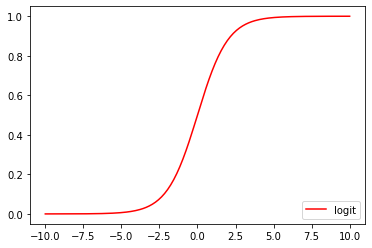

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# plot sigmoid function
x = np.linspace(-10, 10, 200)
y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x, y, 'r-', label='logit')
plt.legend(loc='lower right')

In [10]:
import os
import pandas as pd
path = r'C:\Users\14438\Downloads'
os.chdir(path)
data = pd.read_csv('User_Data.csv', index_col=0 , error_bad_lines = False)


In [12]:
data

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
...,...,...,...,...
15691863,Female,46,41000,1
15706071,Male,51,23000,1
15654296,Female,50,20000,1


In [13]:
data.describe

<bound method NDFrame.describe of           Gender  Age  EstimatedSalary  Purchased
User ID                                          
15624510    Male   19            19000          0
15810944    Male   35            20000          0
15668575  Female   26            43000          0
15603246  Female   27            57000          0
15804002    Male   19            76000          0
...          ...  ...              ...        ...
15691863  Female   46            41000          1
15706071    Male   51            23000          1
15654296  Female   50            20000          1
15755018    Male   36            33000          0
15594041  Female   49            36000          1

[400 rows x 4 columns]>

In [14]:
data.shape

(400, 4)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 15624510 to 15594041
Data columns (total 4 columns):
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3), object(1)
memory usage: 15.6+ KB


In [29]:
# Let's checking missing values in dataset
c=data.isnull().sum().sum()
print("There  {} missing values in our dataset".format(c))

There are 0 missing values in our dataset


In [38]:
# Label encoding
data['Gender'] = np.where(data['Gender'].str.contains('Male'), 1, 0)

AttributeError: Can only use .str accessor with string values!

In [74]:
# Separating independent features and response variable
# create a Python list of feature names
feature_names=['Gender', 'Age','EstimatedSalary']
X = data[feature_names]
X.head()#Let's check the dataset

,Gender,Age,EstimatedSalary
User ID,,,
15624510,1,19,19000
15810944,1,35,20000
15668575,0,26,43000
15603246,0,27,57000
15804002,1,19,76000


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [75]:
#scaled_features=scaler.transform(data.drop('Purchased', axis=1))
scaled_features=scaler.transform(X)

In [108]:
df=pd.DataFrame(scaled_features, columns=data.columns[:-1])
df.head()
#df

,Gender,Age,EstimatedSalary
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751


In [107]:
y = data.Purchased 
y.tail()

User ID
15691863    1
15706071    1
15654296    1
15755018    0
15594041    1
Name: Purchased, dtype: int64

In [110]:
X_train, X_test, y_train, y_test = train_test_split(df, y, random_state = 1,test_size=0.30)

In [109]:
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.model_selection import train_test_split


#----------------Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(df, y,
                                                    stratify= y,
                                                    random_state=42,train_size = 0.7)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred=log_reg.predict(X_test)

C:\Users\14438\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [111]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [112]:
import pandas as pd
df_predicted=pd.DataFrame()
df_predicted['Actual']=y_test
df_predicted['Predicted']=y_pred
df_predicted.head()

,Actual,Predicted
User ID,,
15755018,0,1
15697020,0,0
15796351,1,1
15665760,1,0
15794661,0,0


In [116]:
import numpy as np
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 120 test samples is 48


In [118]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print("Accuracy of test set=",accuracy_score(y_test, y_pred)*100)

Accuracy of test set= 60.0


In [120]:
from sklearn.metrics import confusion_matrix
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=cancer.target_names,
                    columns=cancer.target_names)

cmdf

array([[54, 18],
       [30, 18]], dtype=int64)

In [121]:
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_pred)))

Precision score: 0.5


In [122]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [123]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

F1 Score: 0.42857142857142855


In [124]:
from sklearn.metrics import classification_report

print("The classification report is as follows...\n")
print(classification_report(y_test, y_pred))

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.64      0.75      0.69        72
           1       0.50      0.38      0.43        48

    accuracy                           0.60       120
   macro avg       0.57      0.56      0.56       120
weighted avg       0.59      0.60      0.59       120



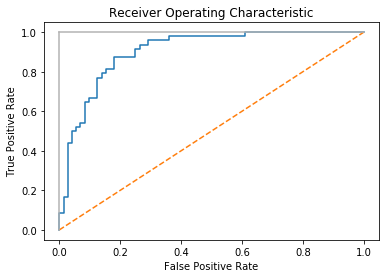

In [125]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
target_probabilities = log_reg.predict_proba(X_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,target_probabilities)

# Plot ROC curve
%matplotlib inline
import matplotlib.pyplot as plt

plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [126]:
from sklearn.model_selection import KFold, cross_val_score, validation_curve
from sklearn.linear_model import LogisticRegression    
log_reg = LogisticRegression()
kfold = KFold(n_splits=5,random_state=7)

cv_results = cross_val_score(log_reg, X_train,y_train, cv=kfold)
print (cv_results.mean()*100, "%")

85.0 %


C:\Users\14438\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\14438\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\14438\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\14438\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\14438\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t